# Lesson 5: Supervised Learning - Identifying Rig State (Sliding vs Rotating)

# ------------------------------
# 📚 SECTION 1: Welcome & Framing
# ------------------------------

Welcome to Lesson 5! 🎉

Today we're going to build an AI model that can automatically tell the difference between *sliding* and *rotating* based only on RPM and Torque.

Think of it like teaching a new driller to recognize rig state—except we’re training a machine to do it for us.

At the end, we’ll discuss how these same methods can scale into platforms like Animo, and how YOUR data can power even bigger insights.


# ------------------------------
# 📚 SECTION 2: Quick Review of Lesson 4
# ------------------------------

Last time we explored **unsupervised learning**:

✅ We let the data group itself without telling it the answers
✅ We used clustering to see patterns (but the model didn’t know what those clusters *meant*)

➡️ Today we flip that around. We’ll **tell the model the answers up front**—so it can learn to predict them on new data.


# ------------------------------
# 📚 SECTION 3: Load or Create Data
# ------------------------------

## For Google Colab compatibility, we'll generate synthetic data inline.
## In practice, you can replace this with file upload or real sensor data.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulate sliding state: low RPM, higher torque
sliding_rpm = np.random.normal(loc=30, scale=10, size=500)
sliding_torque = np.random.normal(loc=1000, scale=800, size=500)
sliding_label = np.zeros(500)  # 0 = sliding

# Simulate rotating state: higher RPM, lower torque
rotating_rpm = np.random.normal(loc=120, scale=25, size=500)
rotating_torque = np.random.normal(loc=15000, scale=2000, size=500)
rotating_label = np.ones(500)  # 1 = rotating

# Combine into one dataset
rpm = np.concatenate([sliding_rpm, rotating_rpm])
torque = np.concatenate([sliding_torque, rotating_torque])
labels = np.concatenate([sliding_label, rotating_label])

df = pd.DataFrame({
    'RPM': rpm,
    'Torque': torque,
    'RigState': labels
})

print("Sample of our data:")
df.head()


Sample of our data:


,RPM,Torque,RigState
0,34.967142,1740.942038,0.0
1,28.617357,2527.533312,0.0
2,36.476885,-118.854059,0.0
3,45.230299,1450.375389,0.0
4,27.658466,479.485945,0.0


# ------------------------------
# 📚 SECTION 4: Visualize the Data
# ------------------------------

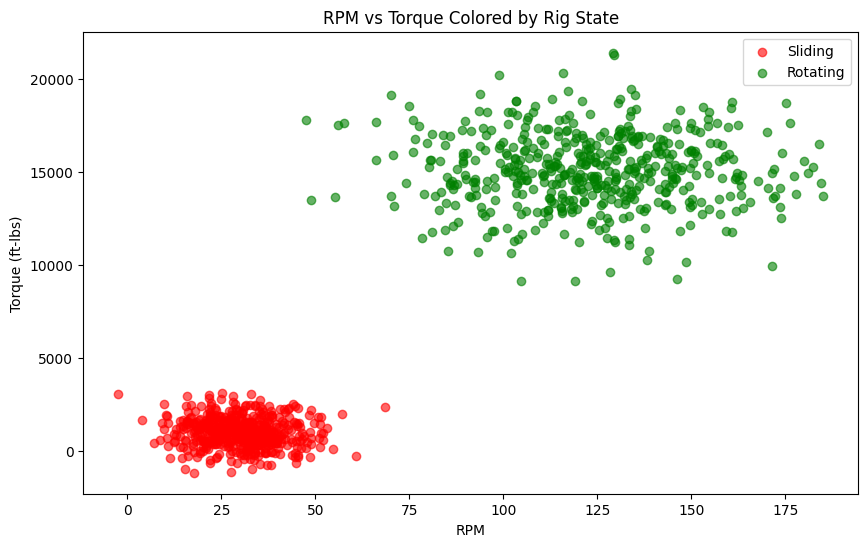

In [12]:
plt.figure(figsize=(10,6))
for label, color in zip([0,1], ['red', 'green']):
    subset = df[df['RigState'] == label]
    plt.scatter(subset['RPM'], subset['Torque'], c=color, label='Sliding' if label==0 else 'Rotating', alpha=0.6)

plt.xlabel('RPM')
plt.ylabel('Torque (ft-lbs)')
plt.title('RPM vs Torque Colored by Rig State')
plt.legend()
plt.show()

# ------------------------------
# 📚 SECTION 5: Train/Test Split
# ------------------------------

| **Model**            | **When to Use**                            | **Pros**                            | **Cons**                          |
|---------------------|-------------------------------------------|------------------------------------|-----------------------------------|
| Logistic Regression   | Simple yes/no problems                    | Fast, easy, interpretable           | Only works with linear boundaries |
| Decision Tree         | Clear, rule-based splits                  | Explainable, flexible               | Can overfit small data            |
| Random Forest         | Noisy data, better accuracy needed        | Handles complexity, robust          | Slower, less transparent          |
| Support Vector Machine| Overlapping classes, complex boundaries   | Works well with hard-to-separate data| Hard to tune, less explainable    |
| Neural Networks       | Lots of data, complex non-linear patterns | Captures deep patterns              | Requires more compute, harder to interpret |


In [13]:
from sklearn.model_selection import train_test_split

# Our features we're training the model on
X = df[['RPM', 'Torque']]
# Our target variable we're trying to predict (0 = sliding, 1 = rotating)
y = df['RigState']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")



Training samples: 800, Testing samples: 200


# ------------------------------
# 📚 SECTION 6: Train Classifier
# ------------------------------

In [14]:
# Install scikit-learn if running in Colab
try:
    import sklearn
except ImportError:
    !pip install scikit-learn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# ------------------------------
# 📚 SECTION 7: Evaluate Model
# ------------------------------

In [15]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 1.00
Confusion Matrix:
[[ 96   0]
 [  0 104]]


# ------------------------------
# 📚 SECTION 8: Visual Prediction on Test Set
# ------------------------------

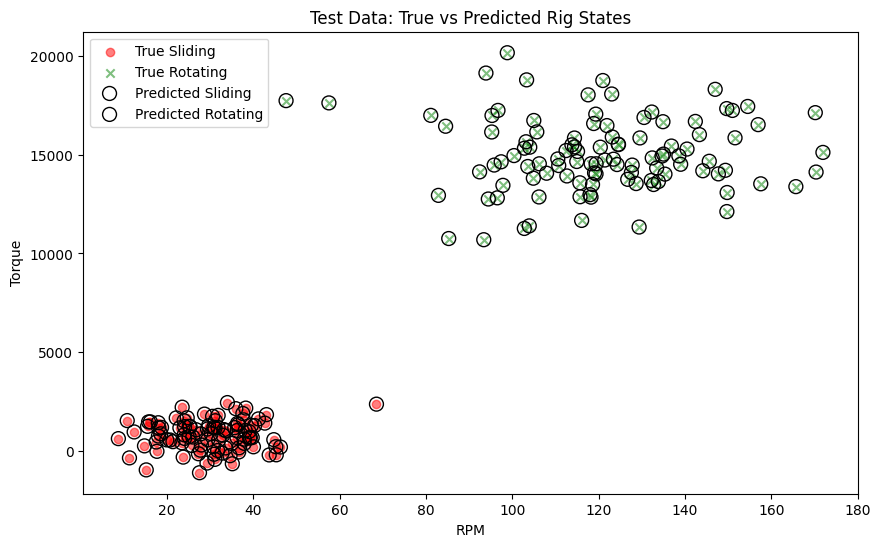

In [16]:
plt.figure(figsize=(10,6))
for true_label, color, marker in zip([0,1], ['red', 'green'], ['o', 'x']):
    subset = X_test[y_test==true_label]
    plt.scatter(subset['RPM'], subset['Torque'], 
                c=color, marker=marker, label=f"True {'Sliding' if true_label==0 else 'Rotating'}", alpha=0.5)

preds = X_test.copy()
preds['Predicted'] = y_pred
for pred_label, edgecolor in zip([0,1], ['black','black']):
    subset = preds[preds['Predicted']==pred_label]
    plt.scatter(subset['RPM'], subset['Torque'], facecolors='none', edgecolors=edgecolor, 
                s=100, linewidths=1, label=f"Predicted {'Sliding' if pred_label==0 else 'Rotating'}")

plt.xlabel('RPM')
plt.ylabel('Torque')
plt.legend()
plt.title('Test Data: True vs Predicted Rig States')
plt.show()

# ------------------------------
# 📚 SECTION 9: Discussion & Next Steps
# ------------------------------


✅ With just RPM and Torque, we achieved simple rig state classification.

✅ Imagine what’s possible with more features and more states.

👉 What other activities could benefit from automated rig state detection?

👉 What additional sensors do YOU wish you had access to?

👉 If you had labeled data like this—what problem would you solve?


We’d love to explore your data and help you unlock these insights. Feel free to reach out or contribute data to our Animo community!